In [2]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload

import bemcs


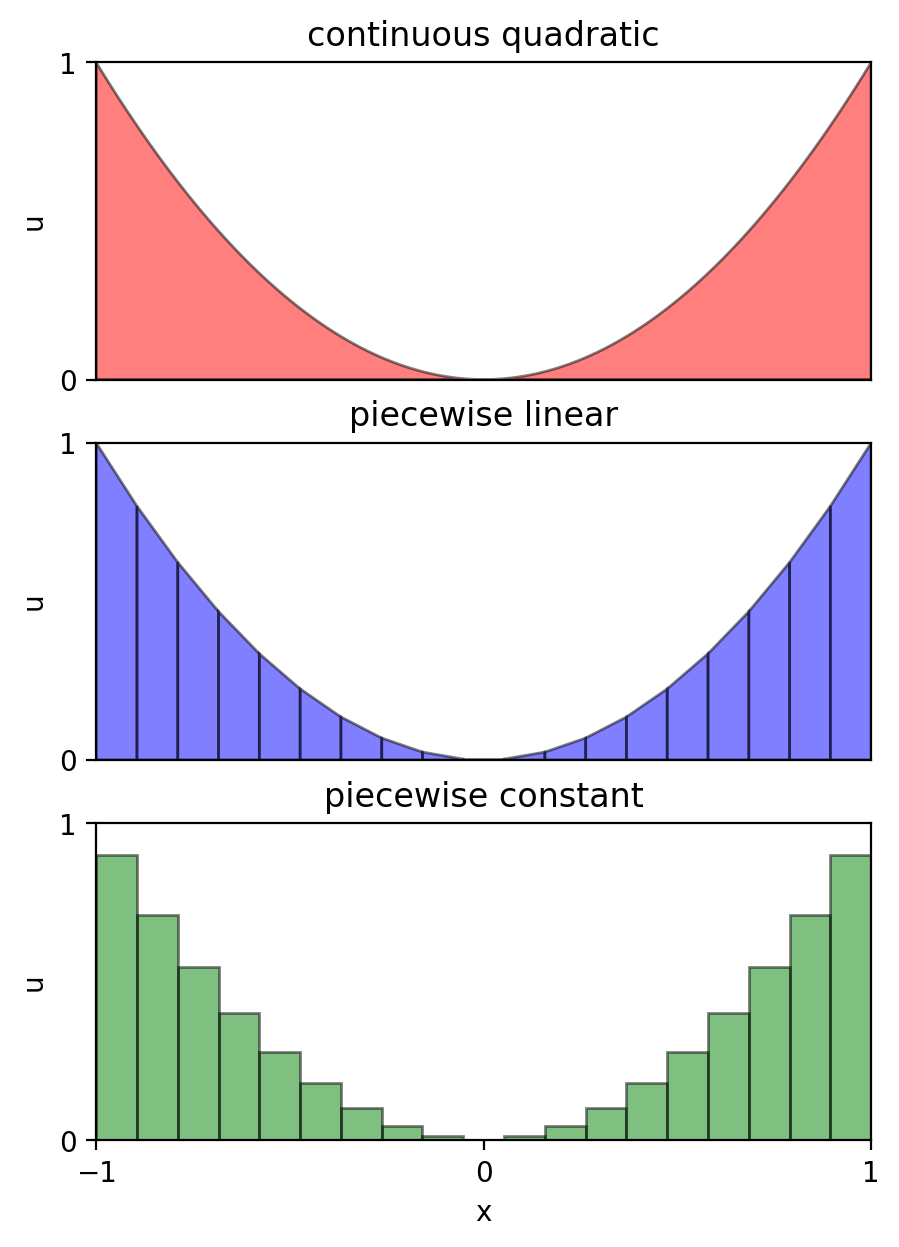

In [83]:
n_pts_high_resolution = 1000
n_pts_low_resolution = 20
n_elements = n_pts_low_resolution - 1
x_high_resolution = np.linspace(-1, 1, n_pts_high_resolution)
x_low_resolution = np.linspace(-1, 1, n_pts_low_resolution)

# Define a quadratic
y_quadratic_high_resolution = x_high_resolution**2.0
y_quadratic_low_resolution = x_low_resolution**2.0

# Define a piecweise linear approximation to quadratic
linear_x1 = np.zeros(n_elements)
linear_x2 = np.zeros(n_elements)
linear_y1 = np.zeros(n_elements)
linear_y2 = np.zeros(n_elements)
for i in range(n_elements):
    linear_x1[i] = x_low_resolution[i]
    linear_x2[i] = x_low_resolution[i + 1]
    linear_y1[i] = y_quadratic_low_resolution[i]
    linear_y2[i] = y_quadratic_low_resolution[i + 1]

# Define a piecewise constant apprximation to quadratic
constant_x1 = np.zeros(n_elements)
constant_x2 = np.zeros(n_elements)
constant_y1 = np.zeros(n_elements)
constant_y2 = np.zeros(n_elements)
for i in range(n_elements):
    constant_x1[i] = x_low_resolution[i]
    constant_x2[i] = x_low_resolution[i + 1]
    constant_y1[i] = 0.5 * (
        y_quadratic_low_resolution[i] + y_quadratic_low_resolution[i + 1]
    )
    constant_y2[i] = 0.5 * (
        y_quadratic_low_resolution[i] + y_quadratic_low_resolution[i + 1]
    )

# Plot nearly continuous vs. piecewise linear and piecwise constant
plt.figure(figsize=(5, 7))

# High-resolution quadratic
plt.subplot(3, 1, 1)
plt.fill(
    np.append(x_high_resolution, [x_high_resolution[-1], x_high_resolution[0]]),
    np.append(y_quadratic_high_resolution, [0, 0]),
    "-r",
    alpha=0.5,
    edgecolor="k",
    label="quadratic",
)
plt.xlim([-1, 1])
plt.ylim([0, 1])
plt.xticks([])
plt.yticks([0, 1])
plt.ylabel("u")
plt.title("continuous quadratic")

# Linear slip elements
plt.subplot(3, 1, 2)
for i in range(n_elements):
    if i == 0:
        plt.fill(
            [linear_x1[i], linear_x2[i], linear_x2[i], linear_x1[i]],
            [linear_y1[i], linear_y2[i], 0, 0],
            "b",
            alpha=0.5,
            edgecolor="k",
            label="piecewise linear",
        )
    else:
        plt.fill(
            [linear_x1[i], linear_x2[i], linear_x2[i], linear_x1[i]],
            [linear_y1[i], linear_y2[i], 0, 0],
            "b",
            alpha=0.5,
            edgecolor="k",
        )

plt.xlim([-1, 1])
plt.ylim([0, 1])
plt.xticks([])
plt.yticks([0, 1])
plt.ylabel("u")
plt.title("piecewise linear")

# Constant slip elements
plt.subplot(3, 1, 3)
for i in range(n_elements):
    if i == 0:
        plt.fill(
            [constant_x1[i], constant_x2[i], constant_x2[i], constant_x1[i]],
            [constant_y1[i], constant_y2[i], 0, 0],
            "g",
            alpha=0.5,
            edgecolor="k",
            label="piecewise constant",
        )
    else:
        plt.fill(
            [constant_x1[i], constant_x2[i], constant_x2[i], constant_x1[i]],
            [constant_y1[i], constant_y2[i], 0, 0],
            "g",
            alpha=0.5,
            edgecolor="k",
        )
plt.xlim([-1, 1])
plt.ylim([0, 1])
plt.xticks([-1, 0, 1])
plt.yticks([0, 1])
plt.xlabel("x")
plt.ylabel("u")
plt.title("piecewise constant")
plt.show()


# Define geometry of single element model

In [ ]:
# List of elements for forward model
n_elements = 1
mu = np.array([3e10])
nu = np.array([0.25])
elements = []
element = {}
L = 10000
x1, y1, x2, y2 = bemcs.discretized_line(-L, 0, L, 0, n_elements)

for i in range(0, x1.size):
    element["x1"] = x1[i]
    element["y1"] = y1[i]
    element["x2"] = x2[i]
    element["y2"] = y2[i]
    elements.append(element.copy())
elements = bemcs.standardize_elements(elements)


# Observation coordinates

In [ ]:
n_pts = 100
width = 20000
x_obs = np.linspace(-width, width, n_pts)
y_obs = np.linspace(-width, width, n_pts)
x_obs, y_obs = np.meshgrid(x_obs, y_obs)
x_obs = x_obs.flatten()
y_obs = y_obs.flatten()


# Single constant slip element

In [ ]:
strike_slip_constant = 1
tensile_slip_constant = 0

(
    displacement_constant,
    stress_constant,
) = bemcs.displacements_stresses_constant_no_rotation(
    x_obs,
    y_obs,
    elements[0]["half_length"],
    mu,
    nu,
    strike_slip_constant,
    tensile_slip_constant,
    elements[0]["x_center"],
    elements[0]["y_center"],
)

bemcs.plot_fields(
    elements,
    x_obs.reshape(n_pts, n_pts),
    y_obs.reshape(n_pts, n_pts),
    displacement_constant,
    stress_constant,
    "constant element",
)


In [72]:
print(np.append(x_high_resolution, x_high_resolution[0]).shape)
print(x_high_resolution.shape)
# print(np.append(x_high_resolution[0].shape))


(1001,)
(1000,)


In [66]:
x_high_resolution[0]


-1.0

In [81]:
np.append(y_quadratic_high_resolution, [0, 0])


array([1.        , 0.996     , 0.99200802, ..., 1.        , 0.        ,
       0.        ])